<a href="https://colab.research.google.com/github/femketenharkel/Predicting_Ratings/blob/main/Error_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Error analysis

# RF + K-MEANS

In [ ]:
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
import joblib
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')
df_final = pd.read_csv('/content/drive/My Drive/Thesis/Data/df_final_K-Means_clustering4.csv')
model = joblib.load("/content/drive/My Drive/Thesis/Models/K-Means_RF.pkl")

Mounted at /content/drive


In [ ]:
# Define feature and target
X = df_final.drop(columns=['Rating'])
y = df_final['Rating']

# Split data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=42)

In [ ]:
# Predict on the test set
test_predictions = model.predict(X_test)

In [ ]:
class_names = sorted(y_train.unique())

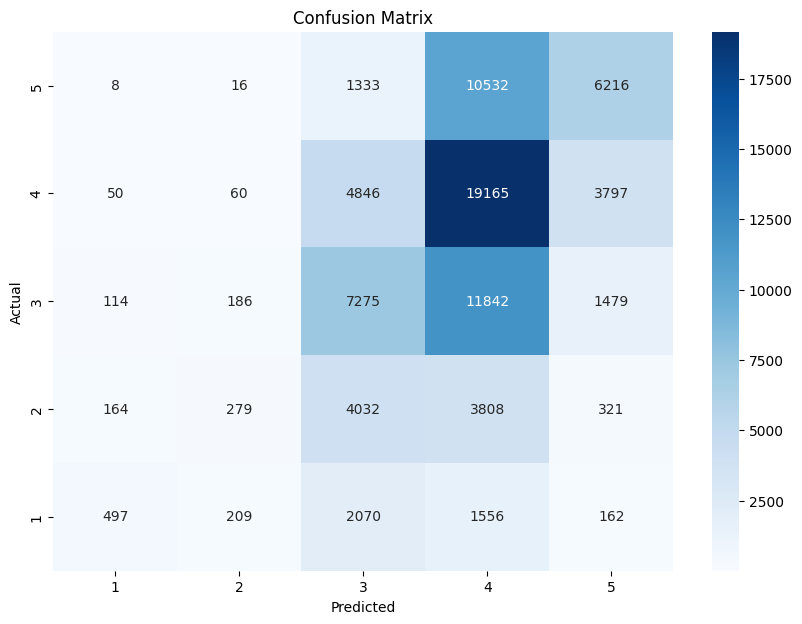

In [ ]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.gca().invert_yaxis()  # Invert the y-axis
plt.show()

# XGB WITH K_MEANS

In [ ]:
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
import joblib
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')
df_final = pd.read_csv('/content/drive/My Drive/Thesis/Data/df_final_K-Means_clustering4.csv')
model = joblib.load("/content/drive/My Drive/Thesis/Models/K-Means_XGB.pkl")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:27:44] WARNING: /workspace/src/gbm/gbtree.cc:388: Changing updater from `grow_gpu_hist` to `grow_quantile_histmaker`.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:27:44] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:27:44] WARNING: /workspace/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


In [ ]:
# Define feature and target
X = df_final.drop(columns=['Rating'])
y = df_final['Rating']

from sklearn.preprocessing import LabelEncoder
# Assuming you have a label encoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
class_names = label_encoder.classes_

# Split data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=42)

In [ ]:
# Predict on the test set
test_predictions = model.predict(X_test)

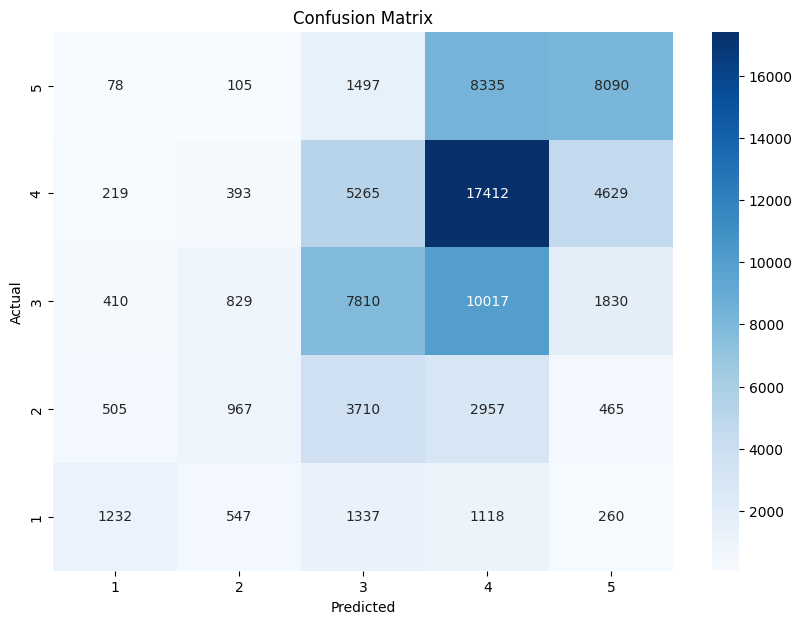

In [ ]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.gca().invert_yaxis()  # Invert the y-axis
plt.show()

# XGBoosting baseline

In [1]:
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
import joblib
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')
df_final = pd.read_csv('/content/drive/My Drive/Thesis/Data/df_final_2.csv')
model = joblib.load('/content/drive/My Drive/Thesis/Models/Baseline_XGB.pkl')

Mounted at /content/drive


In [3]:
# Define feature and target
X = df_final.drop(columns=['Rating'])
y = df_final['Rating']

from sklearn.preprocessing import LabelEncoder
# Assuming you have a label encoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
class_names = label_encoder.classes_

# Split data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=42)

# Predict on the test set
test_predictions = model.predict(X_test)

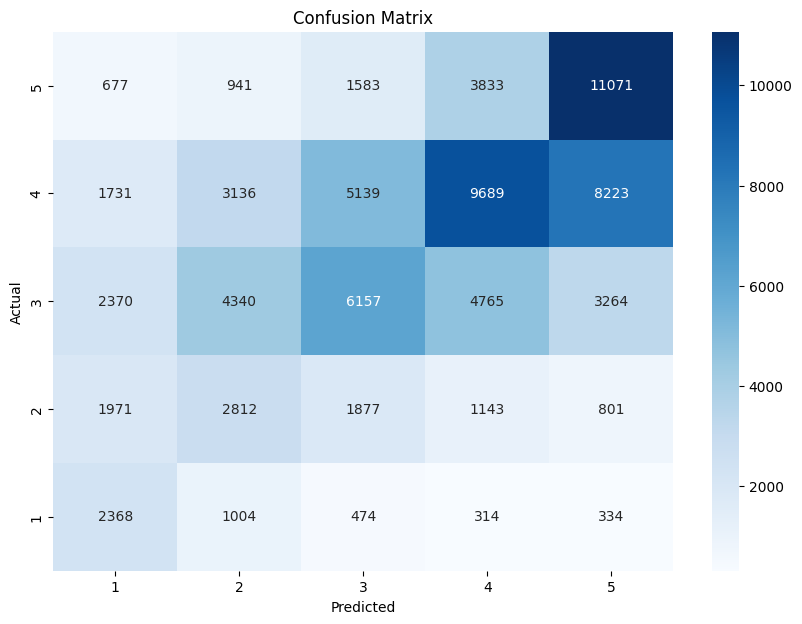

In [6]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.gca().invert_yaxis()  # Invert the y-axis
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve, log_loss, brier_score_loss
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

ROC AUC Scores for each class:
1: 0.7188
2: 0.5975
3: 0.5706
4: 0.5770
5: 0.7038


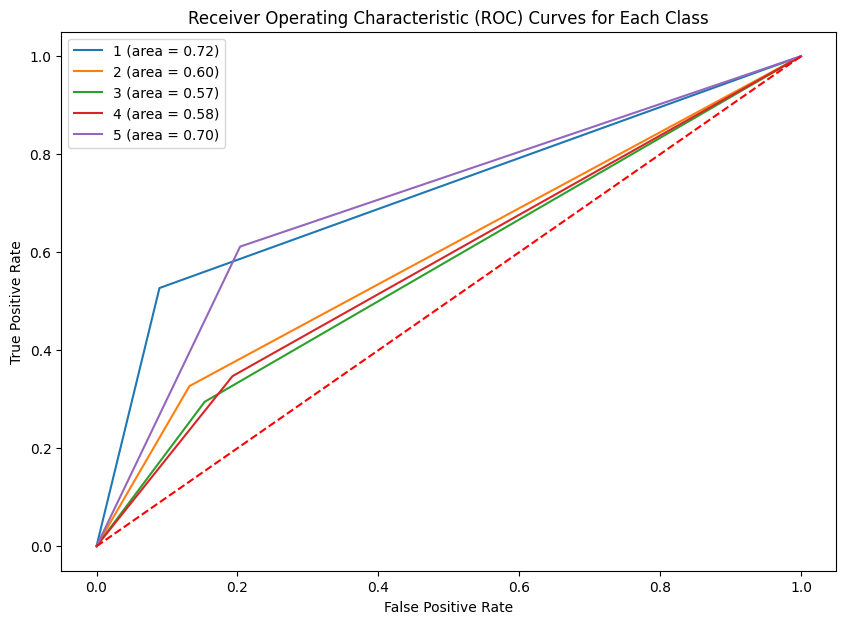

In [9]:
# Binarize the output for multi-class ROC AUC and other metrics
y_test_bin = label_binarize(y_test, classes=range(len(class_names)))
test_predictions_bin = label_binarize(test_predictions, classes=range(len(class_names)))

# ROC AUC Score for each class
roc_auc_dict = {}
for i in range(len(class_names)):
    roc_auc_dict[class_names[i]] = roc_auc_score(y_test_bin[:, i], test_predictions_bin[:, i])

print("ROC AUC Scores for each class:")
for class_name, score in roc_auc_dict.items():
    print(f"{class_name}: {score:.4f}")

# ROC Curves for each class
plt.figure(figsize=(10, 7))
for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], test_predictions_bin[:, i])
    plt.plot(fpr, tpr, label=f'{class_names[i]} (area = {roc_auc_dict[class_names[i]]:.2f})')

plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Each Class')
plt.legend()
plt.show()


In [8]:
# Log Loss
logloss = log_loss(y_test_bin, test_predictions_bin)
print(f"Log Loss: {logloss:.4f}")

# Brier Score Loss for each class
brier_scores = {}
for i in range(len(class_names)):
    brier_scores[class_names[i]] = brier_score_loss(y_test_bin[:, i], test_predictions_bin[:, i])

print("Brier Scores for each class:")
for class_name, score in brier_scores.items():
    print(f"{class_name}: {score:.4f}")

Log Loss: 21.5856
Brier Scores for each class:
1: 0.1109
2: 0.1901
3: 0.2976
4: 0.3535
5: 0.2456


Precision recall curve

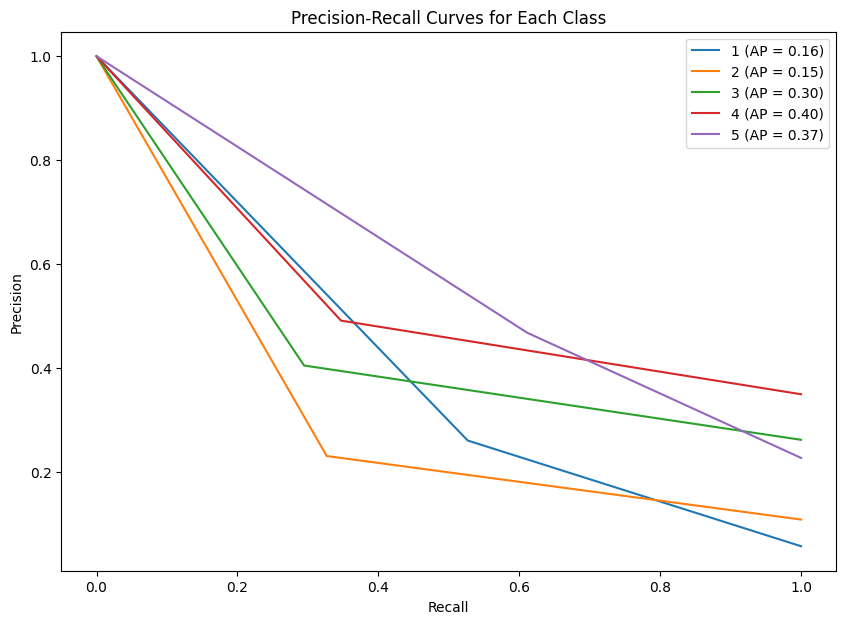

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Assuming the model and data are already loaded and predictions are made
# test_predictions = model.predict(X_test)

# Binarize the output for multi-class Precision-Recall curves
y_test_bin = label_binarize(y_test, classes=range(len(class_names)))
test_predictions_bin = label_binarize(test_predictions, classes=range(len(class_names)))

# Precision-Recall curves for each class
plt.figure(figsize=(10, 7))
for i in range(len(class_names)):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], test_predictions_bin[:, i])
    average_precision = average_precision_score(y_test_bin[:, i], test_predictions_bin[:, i])
    plt.plot(recall, precision, label=f'{class_names[i]} (AP = {average_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Each Class')
plt.legend()
plt.show()

In [12]:
from sklearn.metrics import zero_one_loss

zero_one = zero_one_loss(y_test, test_predictions)
print(f"Zero-One Loss: {zero_one:.4f}")

Zero-One Loss: 0.5989


In [13]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, test_predictions, target_names=class_names, output_dict=True)
for class_name, metrics in class_report.items():
    if class_name != 'accuracy':
        print(f"Class: {class_name}")
        for metric, value in metrics.items():
            print(f"  {metric}: {value:.4f}")

Class: 1
  precision: 0.2597
  recall: 0.5269
  f1-score: 0.3480
  support: 4494.0000
Class: 2
  precision: 0.2299
  recall: 0.3268
  f1-score: 0.2699
  support: 8604.0000
Class: 3
  precision: 0.4043
  recall: 0.2946
  f1-score: 0.3409
  support: 20896.0000
Class: 4
  precision: 0.4907
  recall: 0.3471
  f1-score: 0.4066
  support: 27918.0000
Class: 5
  precision: 0.4673
  recall: 0.6115
  f1-score: 0.5297
  support: 18105.0000
Class: macro avg
  precision: 0.3704
  recall: 0.4214
  f1-score: 0.3790
  support: 80017.0000
Class: weighted avg
  precision: 0.4218
  recall: 0.4011
  f1-score: 0.3993
  support: 80017.0000
